# Contents
- [Iris dataset PCA features](#Iris-dataset-PCA-features)
- [Decision Tree on Iris PCA features](#Decision-Tree-on-Iris-PCA-features)
- [Baseline](#Baseline)
- [PCA and Kernel PCA (KPCA) Features](#PCA-and-Kernel-PCA-(KPCA)-Features)
- [UMAP Features](#UMAP-Features)
- [KMEANS Features](#KMEANS-Features)
- [Performance overview](#Performance-overview)
-- [Performance baseline vs baseline with PCA features](#Performance-baseline-vs-baseline-with-PCA-features)
-- [Performance baseline vs baseline with Kernel PCA features](#Performance-baseline-vs-baseline-with-Kernel-PCA-features)
-- [Performance baseline vs baseline with UMAP features](#Performance-baseline-vs-baseline-with-Kernel-PCA-features)
-- [Performance baseline vs baseline with KMEANS features](#Performance-baseline-vs-baseline-with-KMEANS-features)
- [Plot PCA Features against target](#Plot-PCA-Features-against-target)
- [Plot Kernel PCA Features against target](#Plot-Kernel-PCA-Features-against-target)
- [Plot UMAP Features against target](#Plot-UMAP-Features-against-target)
- [Plot KMEANS Features against target](Plot-KMEANS-Features-against-target)
- [Results Dataframe](#Results-Dataframe)



In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

import numpy as np
from constants import *
import matplotlib.pyplot as plt
import seaborn as sns
from constants import *
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from umap import UMAP
from src.calc_scores import get_X_train_X_test_y_train_y_test
from src.autoencoder_feature import _create_autoencoder_features



taken from [sklearn docu](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html):


## load Iris data

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

colors = ["navy", "turquoise", "darkorange"]
lw = 2

figsize=(10, 10)

# Iris dataset PCA features


Text(0.5, 1.0, 'PCA of IRIS dataset')

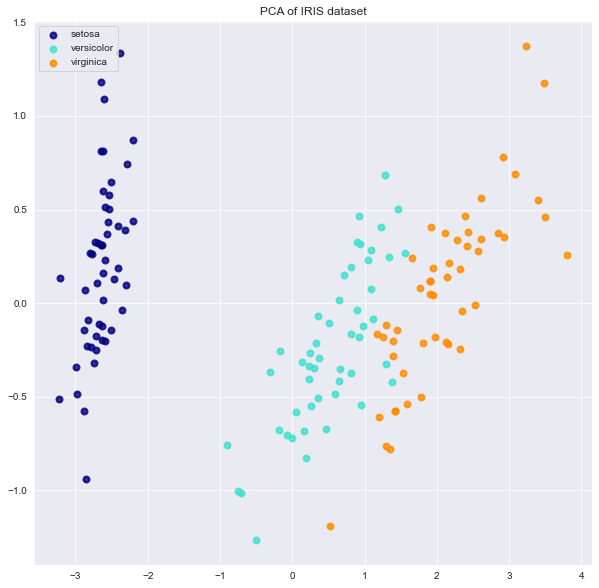

In [3]:
transformer = PCA(n_components=2)
X_r = transformer.fit(X).transform(X)

plt.figure(figsize=figsize)

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

# Iris Dataset Kernel PCA



Text(0.5, 1.0, 'KPCA of IRIS dataset')

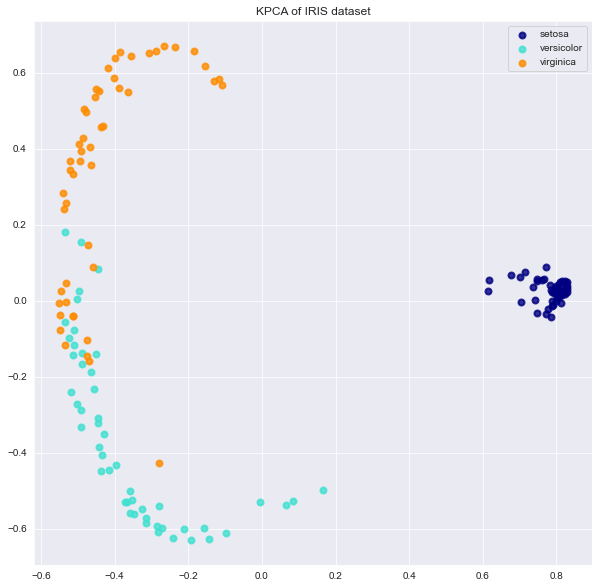

In [4]:
transformer = KernelPCA(n_components=2, kernel="rbf")
X_r = transformer.fit(X).transform(X)

plt.figure(figsize=figsize)

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("KPCA of IRIS dataset")

# Iris Dataset Linear Discriminant Analysis (LDA)

Text(0.5, 1.0, 'LDA of IRIS dataset')

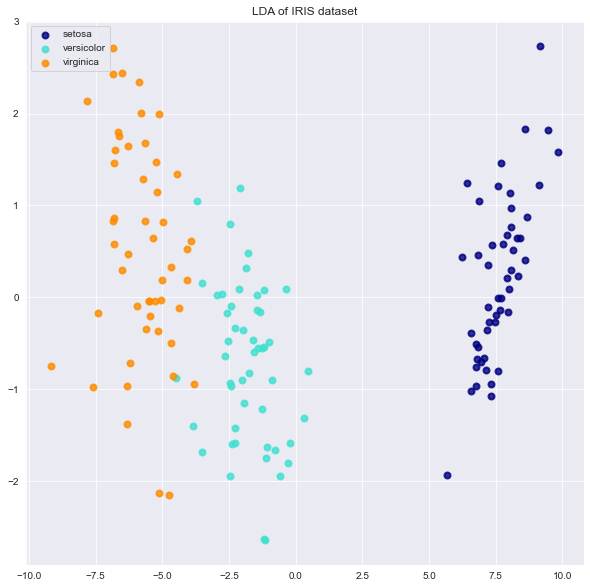

In [5]:
transformer = LinearDiscriminantAnalysis(n_components=2)
X_r = transformer.fit(X, y).transform(X)

plt.figure(figsize=figsize)

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

# Iris Dataset K-Means Clustering


Text(0.5, 1.0, 'K-Means of IRIS dataset')

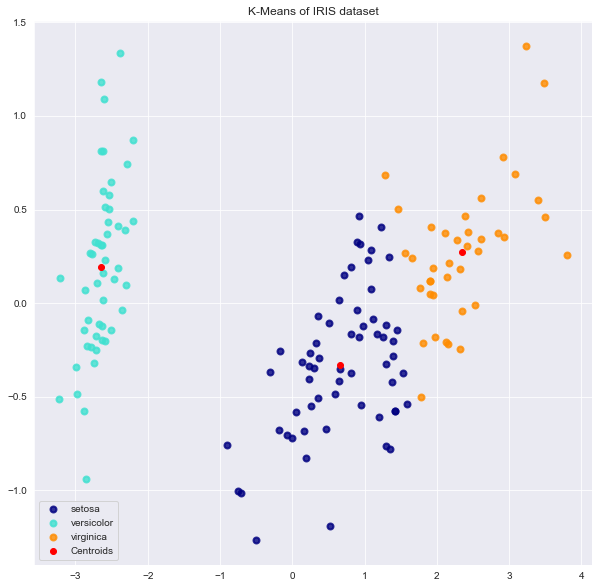

In [6]:
# first transform data to 2 dimensions with pca
transformer = PCA(n_components=2)
X_r = transformer.fit(X).transform(X)

# run k-means
kmeans = KMeans(n_clusters= 3, random_state=RANDOM_STATE, max_iter=300, init="random")
label = kmeans.fit_predict(X_r)

plt.figure(figsize=figsize)

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[label == i, 0], X_r[label == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    #s=100,
    c='red',
    label = 'Centroids'
)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("K-Means of IRIS dataset")

# K-Means im Verlauf der Iterationen

Text(0.5, 1.0, 'K-Means of IRIS dataset')

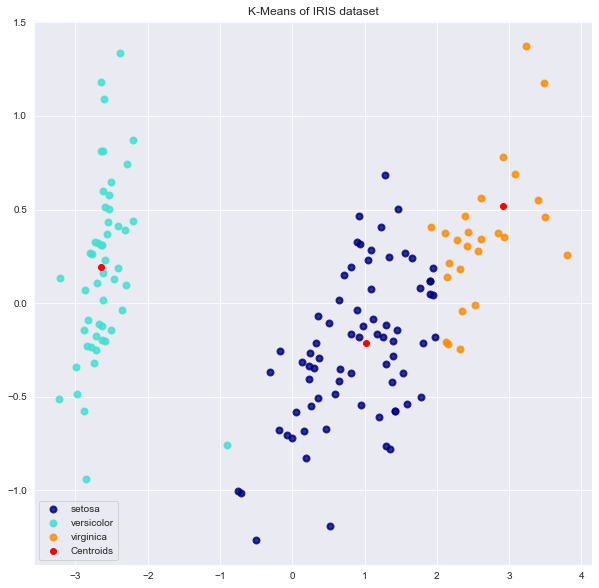

In [7]:
# first transform data to 2 dimensions with pca
transformer = PCA(n_components=2)
X_r = transformer.fit(X).transform(X)

# run k-means
kmeans = KMeans(n_clusters= 3, n_init=1, random_state=RANDOM_STATE, max_iter=1, init="random")
label = kmeans.fit_predict(X_r)

plt.figure(figsize=figsize)

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[label == i, 0], X_r[label == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    #s=100,
    c='red',
    label = 'Centroids'
)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("K-Means of IRIS dataset")

# Iris Dataset UMAP

Text(0.5, 1.0, 'UMAP of IRIS dataset')

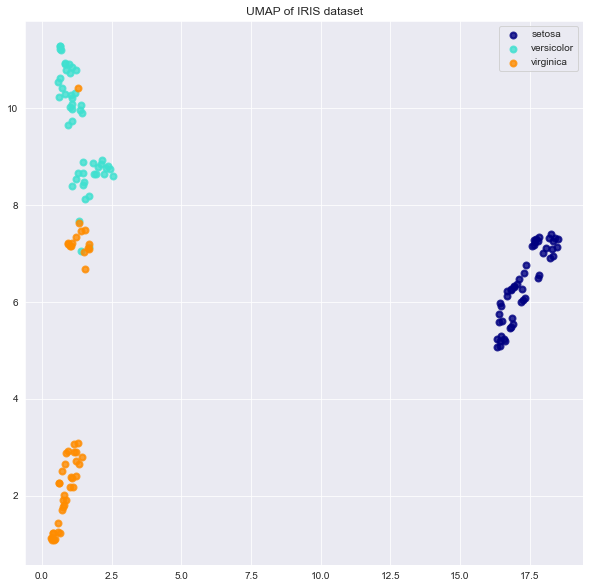

In [8]:
transformer = UMAP(**UMAP_PARAMS)
#transformer = UMAP(n_components=2)
#X_r = transformer.fit(X, y).transform(X)
X_r = transformer.fit(X).transform(X)

plt.figure(figsize=figsize)

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("UMAP of IRIS dataset")

# Dataset 46 Autoencoder


In [9]:

#
# dataset_id = "46"
#
# # load data
# X_train, X_test, y_train, y_test = get_X_train_X_test_y_train_y_test(
#     dataset_folder=DATASETS_FOLDER_PATH.joinpath(dataset_id), random_state=RANDOM_STATE,
#     X_file_name=X_FILTERED_FILE_NAME, y_file_name=Y_FILE_NAME)
#
# X_train_trans, X_test_trans = _create_autoencoder_features(X_train, X_test, AUTOENCODER_PARAMS, "autoencoder_", RANDOM_STATE)
#
# colors_dict = {
#     0: "navy",
#     1: "turquoise",
#     2: "darkorange",
# }
#
# target_dict = {
#     0: 'setosa',
#     1: 'versicolor',
#     2: 'virginica'
# }
#
# # plot df based of X_train
# df = X_train_trans.copy()
# df["y"] = y_train
# df["color"] = df["y"].map(colors_dict)
#


In [10]:
# n_head = 50
#
# for i in range(3):
#     temp_df = df[df["y"] == i]
#
#     plt.scatter(
#         x=temp_df["autoencoder_0"].head(n_head),
#         y=temp_df["autoencoder_1"].head(n_head),
#         color=colors_dict[i],
#         alpha=0.8,
#         lw=lw,
#         label=target_dict[i]
#     )
#
# plt.legend(loc="best", shadow=False, scatterpoints=1)
# plt.title("Autoencoder of dataset 46")

# Iris Autoencoder

In [11]:
from sklearn.preprocessing import StandardScaler

X_r, _ = _create_autoencoder_features(X_train=pd.DataFrame(StandardScaler().fit_transform(X)), X_test=pd.DataFrame(StandardScaler().fit_transform(X)), params=AUTOENCODER_PARAMS, prefix="autoencoder_", random_state=RANDOM_STATE)

colors_dict = {
    0: "navy",
    1: "turquoise",
    2: "darkorange",
}

target_dict = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

# plot df based of X_train
df = X_r
df["y"] = y
df["color"] = df["y"].map(colors_dict)

df.head()



Epoch 1/10000
7/7 [==============================] - 1s 22ms/step - loss: 0.9402 - val_loss: 0.7641
Epoch 2/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.9388 - val_loss: 0.7515
Epoch 3/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.9376 - val_loss: 0.7372
Epoch 4/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.9365 - val_loss: 0.7248
Epoch 5/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.9354 - val_loss: 0.7140
Epoch 6/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.9344 - val_loss: 0.7018
Epoch 7/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.9332 - val_loss: 0.6902
Epoch 8/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.9320 - val_loss: 0.6801
Epoch 9/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.9308 - val_loss: 0.6700
Epoch 10/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.9296 - val_loss: 0.6595
Epoch 11

,autoencoder_0,autoencoder_1,y,color
0,0.000000,0.0,0,navy
1,0.069600,0.0,0,navy
2,0.025555,0.0,0,navy
3,0.075877,0.0,0,navy
4,0.000000,0.0,0,navy


Text(0.5, 1.0, 'Autoencoder of IRIS dataset')

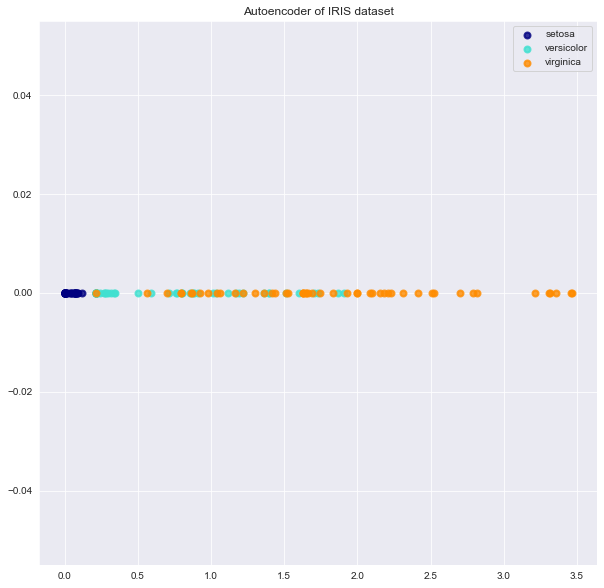

In [12]:
n_head = 1000

plt.figure(figsize=figsize)

for i in range(3):
    temp_df = df[df["y"] == i]

    plt.scatter(
        x=temp_df["autoencoder_0"].head(n_head),
        y=temp_df["autoencoder_1"].head(n_head),
        color=colors_dict[i],
        alpha=0.8,
        lw=lw,
        label=target_dict[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Autoencoder of IRIS dataset")

## Decision Tree on Iris PCA features

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier().fit(X_r, y)
plt.figure(figsize=(17, 10))

plot = tree.plot_tree(dt, filled=True, class_names=target_names)
plt.plot()


ValueError: could not convert string to float: 'navy'

# Baseline

Baseline means a hyperparameter tuned random forest on a cleaned dataset.

Hyperparameter grid used with 5 times cross validation:

```python
{
    "max_depth": [6, None],
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "n_jobs": [-1],
    "class_weight": ["balanced", None],
    "random_state": [1, 42, 1337]
}
```

All datasets are preprocessed with the following steps:
- impute NaN values (numerical data with mean value, categorical data with "missing")
- one hot encode
- standard scale
- label encode
- shuffle data
- hybrid feature selection to select the best up to 100 features (boruta, select from model and Recursive feature elimination with cross-validation)

# PCA and Kernel PCA (KPCA) Features

Both feature types are generated on all features before feature selection. For PCA and KPCA n_components is set to 2.
[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) uses the default settings of sklearn. [KPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) uses the "rbf" kernel and the "randomized" eigen_solver.

# UMAP Features

[UMAP](https://umap-learn.readthedocs.io/en/latest/api.html) runs with default settings besides n_components=2, n_neighbors=100. For the fit only X_train was used even though UMAP can use the target information to be more precise, it's not used because of overfitting.

# KMEANS Features

[KMEANS]("https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html") runs with default settings. n_clusters is bruteforeced in range(2, 11) the best n is selected by silhouette score. For performance reason Mini-Batch K-Means clustering is used.

# Performance-overview

In total 72 datasets were used for this experiment.
- PCA features improved the accuracy score on the test data in 36 of 72 datasets (50.0%)
- Kernel PCA features improved the accuracy score on the test data in 38 of 72 datasets (52.78%)
- UMAP features improved the accuracy score on the test data in 28 of 72 datasets (38.89%)
- KMEANS features improved the accuracy score on the test data in 31 of 72 datasets (43.06%)

When all modes were tried the performance was improved 55 out of 72 datasets (76.39%)


# Performance baseline vs baseline with PCA features


In [ ]:
df = pd.read_feather(RESULTS_FILE_PATH).\
    sort_values(by="pca_clean_test_score_change_to_baseline", ascending=True).\
    reset_index(drop=True)

select_columns = ["dataset_id", "baseline_test_score", "pca_clean_test_score", "pca_clean_test_score_change_to_baseline"]
df[select_columns]


In [ ]:
n_improved_datasets = sum(df["pca_clean_test_score_change_to_baseline"] > 0)
n_total_datasets = len(df)


In [ ]:
print(f"The accuracy was improved in {n_improved_datasets} of {n_total_datasets} datasets ({n_improved_datasets / n_total_datasets * 100}%)")

In [ ]:
df.plot.\
    barh(
        x="dataset_id",
        y="pca_clean_test_score_change_to_baseline",
        color=(df["pca_clean_test_score_change_to_baseline"] > 0).map({True: 'g', False: 'r'}),
        figsize=(15, 15)
    )


# Performance baseline vs baseline with Kernel PCA features


In [ ]:
df = pd.read_feather(RESULTS_FILE_PATH).\
    sort_values(by="kpca_clean_test_score_change_to_baseline", ascending=True).\
    reset_index(drop=True)

select_columns = ["dataset_id", "baseline_test_score", "kpca_clean_test_score", "kpca_clean_test_score_change_to_baseline"]
df[select_columns]

In [ ]:
n_improved_datasets = sum(df["kpca_clean_test_score_change_to_baseline"] > 0)
n_total_datasets = len(df)

In [ ]:
print(f"The accuracy was improved in {n_improved_datasets} of {n_total_datasets} datasets ({n_improved_datasets / n_total_datasets * 100}%)")

In [ ]:
df.plot.\
    barh(
        x="dataset_id",
        y="kpca_clean_test_score_change_to_baseline",
        color=(df["kpca_clean_test_score_change_to_baseline"] > 0).map({True: 'g', False: 'r'}),
        figsize=(15, 15)
    )

# Performance baseline vs baseline with UMAP features

In [ ]:
df = pd.read_feather(RESULTS_FILE_PATH).\
    sort_values(by="umap_clean_test_score_change_to_baseline", ascending=True).\
    reset_index(drop=True)

select_columns = ["dataset_id", "baseline_test_score", "umap_clean_test_score", "umap_clean_test_score_change_to_baseline"]
df[select_columns]

In [ ]:
n_improved_datasets = sum(df["umap_clean_test_score_change_to_baseline"] > 0)
n_total_datasets = len(df)

In [ ]:
print(f"The accuracy was improved in {n_improved_datasets} of {n_total_datasets} datasets ({n_improved_datasets / n_total_datasets * 100}%)")

In [ ]:
df.plot.\
    barh(
        x="dataset_id",
        y="umap_clean_test_score_change_to_baseline",
        color=(df["umap_clean_test_score_change_to_baseline"] > 0).map({True: 'g', False: 'r'}),
        figsize=(15, 15)
    )

# Performance baseline vs baseline with KMEANS features

In [ ]:
df = pd.read_feather(RESULTS_FILE_PATH).\
    sort_values(by="kmeans_clean_test_score_change_to_baseline", ascending=True).\
    reset_index(drop=True)

select_columns = ["dataset_id", "baseline_test_score", "kmeans_clean_test_score", "kmeans_clean_test_score_change_to_baseline"]
df[select_columns]

In [ ]:
n_improved_datasets = sum(df["kmeans_clean_test_score_change_to_baseline"] > 0)
n_total_datasets = len(df)

In [ ]:
print(f"The accuracy was improved in {n_improved_datasets} of {n_total_datasets} datasets ({n_improved_datasets / n_total_datasets * 100}%)")


In [ ]:
df.plot.\
    barh(
        x="dataset_id",
        y="kmeans_clean_test_score_change_to_baseline",
        color=(df["kmeans_clean_test_score_change_to_baseline"] > 0).map({True: 'g', False: 'r'}),
        figsize=(15, 15)
    )

## set a dataset you want to use

In [ ]:
#dataset_id = "40978"  # 2 classes, ~3k features
#dataset_id = "3"  # 2 classes, 73 features
dataset_id = "1486"  # 2 classes, 174 features
#dataset_id = "41027"  # 3 classes, 6 features


n_head = 1000000000

In [ ]:
colors = {0:'red', 1:'black', 2:'blue'}

# Plot PCA Features against target


In [ ]:
# load data
df_pca_test = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_TEST_CLEAN_PCA_FILE_NAME))
X = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_CLEAN_FILE_NAME))
y = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, Y_FILE_NAME))["y"]

# short feedback of the data and classes
print(f"X shape: {X.shape}")
print(f"target classes: \n{y.value_counts()}")

# split according to the split from training
_, _, _, y_test = train_test_split(X, y, train_size=TRAIN_TEST_SPLIT_TRAIN_SIZE, random_state=RANDOM_STATE)

# reset index
y_test.reset_index(drop=True, inplace=True)

# concat
df_pca_test["y"] = y_test.reset_index(drop=True)

# make a plot
plot_x = df_pca_test["pca_0"].head(n_head)
plot_y = df_pca_test["pca_1"].head(n_head)
plot_c = df_pca_test["y"].head(n_head)

plt.figure(figsize = (15,15))
plt.scatter(x=plot_x, y=plot_y, c=plot_c.map(colors), alpha=0.5)

# set ranges to the axis if needed
# plt.xlim([-2, 2])
# plt.ylim([-5, 5])




# Plot Kernel PCA Features against target

In [ ]:
# load data
df_pca_test = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_TEST_CLEAN_KPCA_FILE_NAME))
X = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_CLEAN_FILE_NAME))
y = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, Y_FILE_NAME))["y"]

# short feedback of the data and classes
print(f"X shape: {X.shape}")
print(f"target classes: \n{y.value_counts()}")

# split according to the split from training
_, _, _, y_test = train_test_split(X, y, train_size=TRAIN_TEST_SPLIT_TRAIN_SIZE, random_state=RANDOM_STATE)

# reset index
y_test.reset_index(drop=True, inplace=True)

# concat
df_pca_test["y"] = y_test.reset_index(drop=True)

# make a plot
plot_x = df_pca_test["kpca_0"].head(n_head)
plot_y = df_pca_test["kpca_1"].head(n_head)
plot_c = df_pca_test["y"].head(n_head)

plt.figure(figsize = (15,15))
plt.scatter(x=plot_x, y=plot_y, c=plot_c.map(colors), alpha=0.5)

# set ranges to the axis if needed
# plt.xlim([-1, 1])
# plt.ylim([-1, 1])


# Plot UMAP Features against target

In [ ]:
# load data
df_umap_test = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_TEST_CLEAN_UMAP_FILE_NAME))
X = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_CLEAN_FILE_NAME))
y = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, Y_FILE_NAME))["y"]

# short feedback of the data and classes
print(f"X shape: {X.shape}")
print(f"target classes: \n{y.value_counts()}")

# split according to the split from training
_, _, _, y_test = train_test_split(X, y, train_size=TRAIN_TEST_SPLIT_TRAIN_SIZE, random_state=RANDOM_STATE)

# reset index
y_test.reset_index(drop=True, inplace=True)

# concat
df_umap_test["y"] = y_test.reset_index(drop=True)

# make a plot
plot_x = df_umap_test["umap_0"].head(n_head)
plot_y = df_umap_test["umap_1"].head(n_head)
plot_c = df_umap_test["y"].head(n_head)

plt.figure(figsize = (15,15))
plt.scatter(x=plot_x, y=plot_y, c=plot_c.map(colors), alpha=0.5)

# set ranges to the axis if needed
# plt.xlim([-2, 2])
# plt.ylim([-5, 5])

# Plot KMEANS Features against target

Can not plot 1d data.

In [ ]:
# load data
kmeans_test = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, "kmeans_test_clean.feather"))
y = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, Y_FILE_NAME))["y"]

kmeans_test["y"] = y
kmeans_test["kmeans_cluster_equals_target"] = kmeans_test["kmeans_0"] == kmeans_test["y"]

In [ ]:
print(f"kmeans cluster and the target are the same @{round(kmeans_test['kmeans_cluster_equals_target'].sum() / len(kmeans_test) * 100, 2)}%")

# Results Dataframe

In [ ]:
df = pd.read_feather(RESULTS_FILE_PATH)

In [ ]:
df

In [ ]:
# for column in df.columns:
#     print(column)

In [ ]:
correlation = df[
    ['pca_clean_test_score > baseline_test_score',
     'kpca_clean_test_score > baseline_test_score',
     'umap_clean_test_score > baseline_test_score',
     'kmeans_clean_test_score > baseline_test_score',
     "pca_kpca_umap_kmeans_clean_test_score > baseline_test_score"
     ]
].corr()
correlation.style.background_gradient(cmap='coolwarm').format(precision=2)


In [ ]:
print(f"improved {df['any_feature_type_clean_test_score > baseline_test_score'].sum()} out of {len(df)} datasets = {round(df['any_feature_type_clean_test_score > baseline_test_score'].sum() / len(df) * 100, 2)}%")